In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import seaborn as sns

Found 1311 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
164/164 [==============================] - 18s 105ms/step
VGG Net Metrics:
Accuracy: 0.9626
Precision: 0.9630
Recall: 0.9626
F1-Score: 0.9623
--------------------
Google Net Metrics:
Accuracy: 0.8154
Precision: 0.8161
Recall: 0.8154
F1-Score: 0.8131
--------------------
Alex Net Metrics:
Accuracy: 0.9390
Precision: 0.9436
Recall: 0.9390
F1-Score: 0.9392
--------------------
Hard Voting Metrics:
Accuracy: 0.9588
Precision: 0.9593
Recall: 0.9588
F1-Score: 0.9588
--------------------


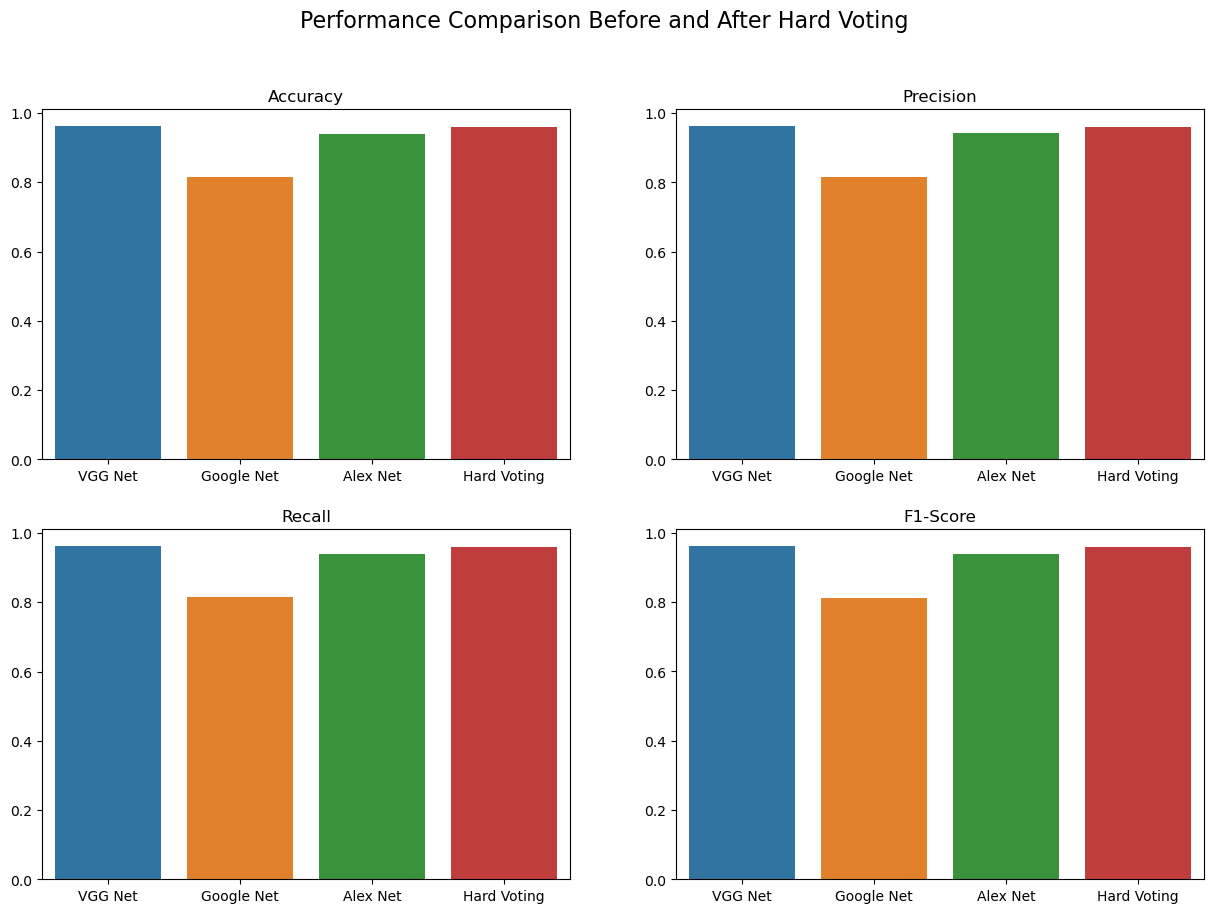

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained models
vgg_net_model = load_model('VGG_NET_Model_Result.h5')
google_net_model = load_model('Google_NET_Model_Result.h5')
alex_net_model = load_model('Alex_NET_Model_Result.h5')
file_path_test = 'D:/Personal/bitirme/grad/archive/testing'

test_datagenetor = ImageDataGenerator()
test_data = test_datagenetor.flow_from_directory(
    file_path_test,
    target_size=(224, 224),
    shuffle=False,
    batch_size=8,
    class_mode='categorical'
)


test_data_for_google_net = test_datagenetor.flow_from_directory(
    file_path_test,
    target_size=(299, 299),
    shuffle=False,
    batch_size=8,
    class_mode='categorical'
)

vgg_net_preds = vgg_net_model.predict(test_data)
google_net_preds = google_net_model.predict(test_data_for_google_net)
alex_net_preds = alex_net_model.predict(test_data)

all_preds = np.concatenate((vgg_net_preds, google_net_preds, alex_net_preds), axis=1)

vgg_net_hard_preds = np.argmax(vgg_net_preds, axis=1)
google_net_hard_preds = np.argmax(google_net_preds, axis=1)
alex_net_hard_preds = np.argmax(alex_net_preds, axis=1)

hard_votes = np.zeros_like(vgg_net_hard_preds)

for i in range(len(hard_votes)):
    votes = [vgg_net_hard_preds[i], google_net_hard_preds[i], alex_net_hard_preds[i]]
    hard_votes[i] = max(set(votes), key=votes.count)

true_labels = test_data.classes

hard_voting_acc = accuracy_score(true_labels, hard_votes)

models = ['VGG Net', 'Google Net', 'Alex Net', 'Hard Voting']
accuracies = [accuracy_score(true_labels, np.argmax(vgg_net_preds, axis=1)),
              accuracy_score(true_labels, np.argmax(google_net_preds, axis=1)),
              accuracy_score(true_labels, np.argmax(alex_net_preds, axis=1)),
              hard_voting_acc]

precisions = [precision_score(true_labels, np.argmax(vgg_net_preds, axis=1), average='weighted'),
              precision_score(true_labels, np.argmax(google_net_preds, axis=1), average='weighted'),
              precision_score(true_labels, np.argmax(alex_net_preds, axis=1), average='weighted'),
              precision_score(true_labels, hard_votes, average='weighted')]

recalls = [recall_score(true_labels, np.argmax(vgg_net_preds, axis=1), average='weighted'),
           recall_score(true_labels, np.argmax(google_net_preds, axis=1), average='weighted'),
           recall_score(true_labels, np.argmax(alex_net_preds, axis=1), average='weighted'),
           recall_score(true_labels, hard_votes, average='weighted')]

f1_scores = [f1_score(true_labels, np.argmax(vgg_net_preds, axis=1), average='weighted'),
             f1_score(true_labels, np.argmax(google_net_preds, axis=1), average='weighted'),
             f1_score(true_labels, np.argmax(alex_net_preds, axis=1), average='weighted'),
             f1_score(true_labels, hard_votes, average='weighted')]

for model, acc, prec, rec, f1 in zip(models, accuracies, precisions, recalls, f1_scores):
    print(f'{model} Metrics:')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('-' * 20)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Comparison Before and After Hard Voting', fontsize=16)

sns.barplot(ax=axes[0, 0], x=models, y=accuracies)
axes[0, 0].set_title('Accuracy')

sns.barplot(ax=axes[0, 1], x=models, y=precisions)
axes[0, 1].set_title('Precision')

sns.barplot(ax=axes[1, 0], x=models, y=recalls)
axes[1, 0].set_title('Recall')

sns.barplot(ax=axes[1, 1], x=models, y=f1_scores)
axes[1, 1].set_title('F1-Score')

plt.show()
